In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from scipy.linalg import inv

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [1, 0, -3]])

In [7]:
B = inv(A)

In [8]:
B @ A

array([[  1.00000000e+00,   1.11022302e-16,   0.00000000e+00],
       [  1.11022302e-16,   1.00000000e+00,  -8.88178420e-16],
       [  1.11022302e-16,   2.22044605e-16,   1.00000000e+00]])

In [9]:
from numpy import isclose

In [10]:
from numpy import eye

In [11]:
eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [12]:
B @ A

array([[  1.00000000e+00,   1.11022302e-16,   0.00000000e+00],
       [  1.11022302e-16,   1.00000000e+00,  -8.88178420e-16],
       [  1.11022302e-16,   2.22044605e-16,   1.00000000e+00]])

In [13]:
isclose(B @ A, eye(3))

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [14]:
A @ B

array([[  1.00000000e+00,   1.11022302e-16,   0.00000000e+00],
       [  1.77635684e-15,   1.00000000e+00,   4.44089210e-16],
       [  0.00000000e+00,  -1.11022302e-16,   1.00000000e+00]])

In [15]:
isclose(A @ B, eye(3))

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [16]:
isclose(B @ A, eye(3)).all()

True

In [17]:
B @ A == eye(3)

array([[False, False,  True],
       [False, False, False],
       [False, False,  True]], dtype=bool)

In [18]:
inv(np.matrix([[1, 2], [2, 3.9999999999]]))

array([[ -3.99999967e+10,   1.99999983e+10],
       [  1.99999983e+10,  -9.99999917e+09]])

In [19]:
A = np.array([[1, 1], [0, 1]])

In [20]:
t = np.linspace(0, 2 * np.pi, 201)

In [21]:
x = np.cos(t)
y = np.sin(t)

In [22]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [23]:
def my_fun(x, y, z):
    print('x', x, 'y', y, 'z', z)
my_fun(1, 2, 3)
my_fun(*[1, 2, 3])

x 1 y 2 z 3
x 1 y 2 z 3


In [24]:
from scipy.linalg import eig

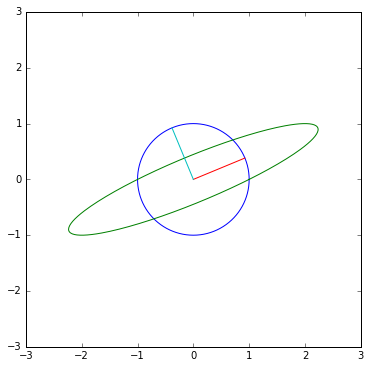

In [25]:
A = np.array([[1, 2], [0, 1]])

plt.figure(figsize=(6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(x, y)

points = np.array([x, y])
newpoints = A @ points
plt.plot(newpoints[0], newpoints[1])
# find and plot eigenvects of A @ A.T
B = A @ A.T
evals, evects = eig(B)
plt.plot([0, evects[0, 0]], [0, evects[1, 0]])
plt.plot([0, evects[0, 1]], [0, evects[1, 1]])

In [26]:
from scipy.linalg import svd

In [27]:
svd(A)

(array([[ 0.92387953, -0.38268343],
        [ 0.38268343,  0.92387953]]),
 array([ 2.41421356,  0.41421356]),
 array([[ 0.38268343,  0.92387953],
        [-0.92387953,  0.38268343]]))

In [28]:
evals, evects = eig(B)

In [29]:
evects

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

In [30]:
def f(u):
#    return u[0] ** 2 + 10 * u[1] ** 2
    return (1 - u[0]) ** 2 + \
            100 * (u[1] - u[0] ** 2) ** 2

In [31]:
def Df(u):
    return np.array([-2 * (1 - u[0]) - \
            100 * 2 * (u[1] - u[0] ** 2) * 2 * u[0], 
            100 * 2 * (u[1] - u[0] ** 2)])

In [32]:
from scipy.linalg import norm

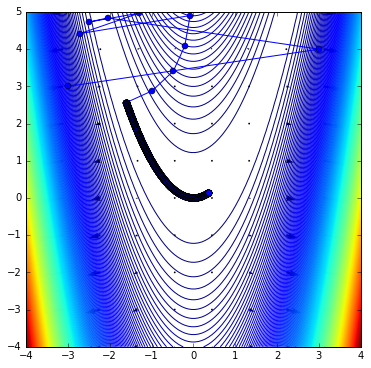

In [38]:
delta = 0.001 / 1.2
steps = 200000
x_prev = np.array([-3, 3])

x, y = np.mgrid[-4:4:100j, -4:5:100j]
plt.figure(figsize=(6, 6))
plt.contour(x, y, f([x, y]), 300)
# plt.contour(x, y, f([x, y]), levels = np.linspace(-1000, 1000))

points = []
for i in range(steps):
    points.append(x_prev)
    x_new = x_prev - delta * Df(x_prev)
    x_prev = x_new
    if norm(Df(x_new)) < 1:
        break

plt.plot([p[0] for p in points], [p[1] for p in points]
         , 'o-')
x, y = np.mgrid[-4:4:10j, -4:5:10j]
plt.quiver(x, y, *Df([x, y]))

In [22]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Surface, Scatter3d

In [10]:
init_notebook_mode()

In [25]:
x, y = np.mgrid[-3:3:100j, -1:6:100j]
iplot([Surface(x=x, y=y, z=f([x, y])),
       Scatter3d(x = [p[0] for p in points],
                 y = [p[1] for p in points],
                 z = [f(p) for p in points], mode = 'line')])

In [71]:
x

array([[-2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4]])

In [72]:
y

array([[-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2]])

In [61]:
x + y

array([[-4, -3, -2, -1,  0],
       [-3, -2, -1,  0,  1],
       [-2, -1,  0,  1,  2],
       [-1,  0,  1,  2,  3],
       [ 0,  1,  2,  3,  4]])